In [233]:
import numpy as np
from datascience import *

# Configure notebook (happens automatically on data8.berkeley.edu)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

In [234]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    "Compute r."
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

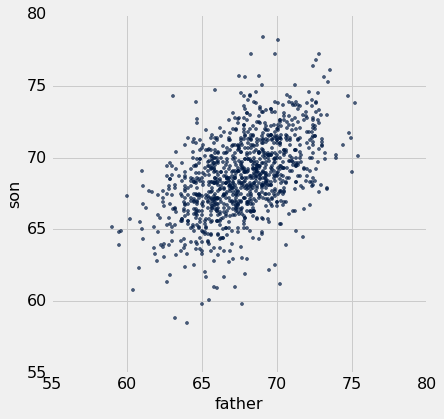

In [235]:
heights = Table.read_table('heights.csv')
fathers = heights.column('father')
sons = heights.column('son')
heights.scatter('father', 'son', s=10)

In [236]:
r = correlation(heights, 'father', 'son')
r

0.50116268080759108

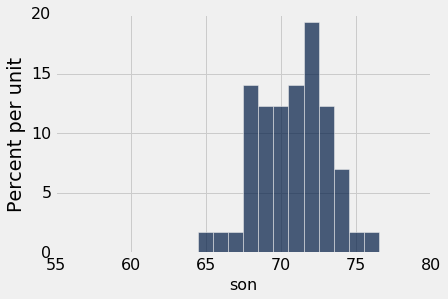

In [237]:
six_foot_fathers = heights.where(np.round(fathers) == 72)
six_foot_fathers.hist('son', bins=np.arange(55.5, 80, 1))

In [238]:
sons_of_sff = np.mean(six_foot_fathers.column('son'))
sons_of_sff

70.728070175438603

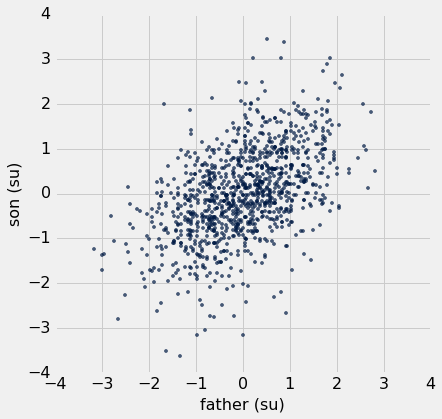

In [239]:
heights_su = Table().with_columns([
        'father (su)', standard_units(fathers),
        'son (su)', standard_units(sons)
    ])
heights_su.scatter('father (su)', s=10)

In [240]:
six_foot_su = (72-np.average(fathers))/np.std(fathers)
six_foot_su

1.5715390503947599

In [241]:
(sons_of_sff - np.average(sons))/np.std(sons)

0.72608234068283417

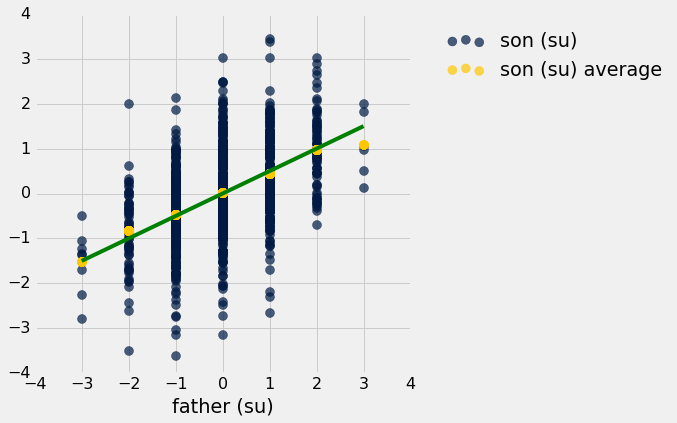

In [242]:
rounded = heights_su.with_column('father (su)', np.round(father_su))
rounded.join('father (su)', rounded.group(0, np.average)).scatter(0, s=80)

import matplotlib.pyplot as plt
plt.plot([-3, 3], [-3 * r, 3 * r], color='g')

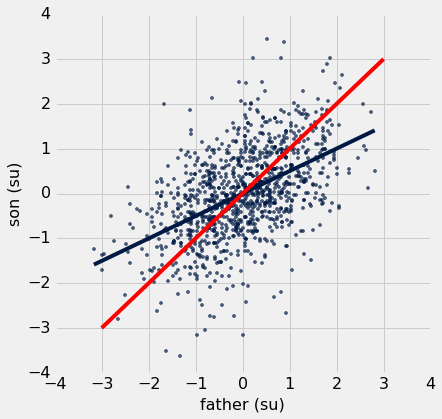

In [243]:
heights_su.scatter('father (su)', s=10, fit_line=True)
# plt.plot([-3, 3], [-3 * r, 3 * r], color='b')
plt.plot([-3, 3], [-3, 3], color='r')

In [244]:
(r * six_foot_su) * np.std(sons) + np.average(sons)

70.901226243944336

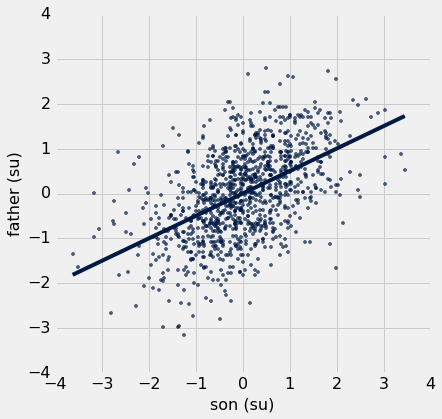

In [245]:
heights_su.scatter('son (su)', s=10, fit_line=True)

## Discussion

In [246]:
x = 90
x_su = (x-70)/10
y_su = 0.75 * x_su
y_su * 12 + 50

68.0

In [247]:
x = 60
x_su = (x-70)/10
y_su = 0.75 * x_su
y_su * 12 + 50

41.0

In [248]:
68-41

27

## Slope & Intercept

In [249]:
def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

[slope(heights, 'father', 'son'), intercept(heights, 'father', 'son')]

[0.51400591254559247, 33.892800540661682]

In [250]:
r

0.50116268080759108

In [251]:
def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

fitted = heights.with_column('son (fitted)', fit(heights, 'father', 'son'))
fitted

father,son,son (fitted)
65,59.8,67.3032
63.3,63.2,66.4294
65,63.3,67.3032
65.8,62.8,67.7144
61.1,64.3,65.2986
63,64.2,66.2752
65.4,64.1,67.5088
64.7,64,67.149
66.1,64.6,67.8686
67,64,68.3312


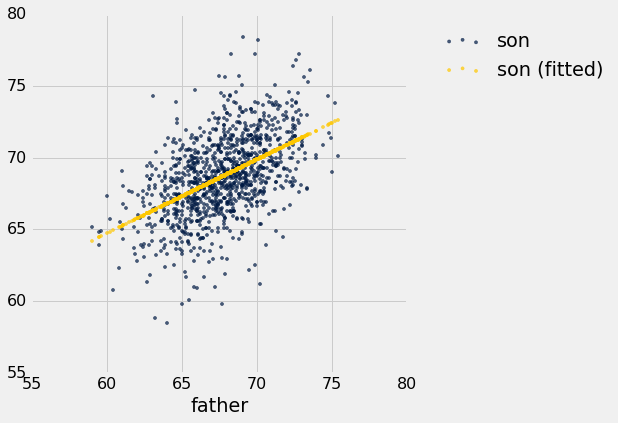

In [252]:
fitted.scatter(0, s=10)

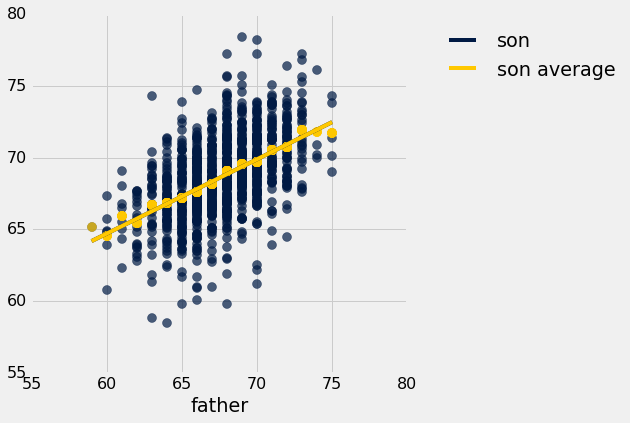

In [253]:
rounded = heights.with_column('father', np.round(heights.column('father')))
rounded.join('father', rounded.group(0, np.average)).scatter(0, s=80, fit_line=True)